In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
sns.set_style("white")

In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 7.]

In [3]:
battles = pd.read_csv("datasets/battles.csv")

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## Impact of Army Size on Battle Outcome

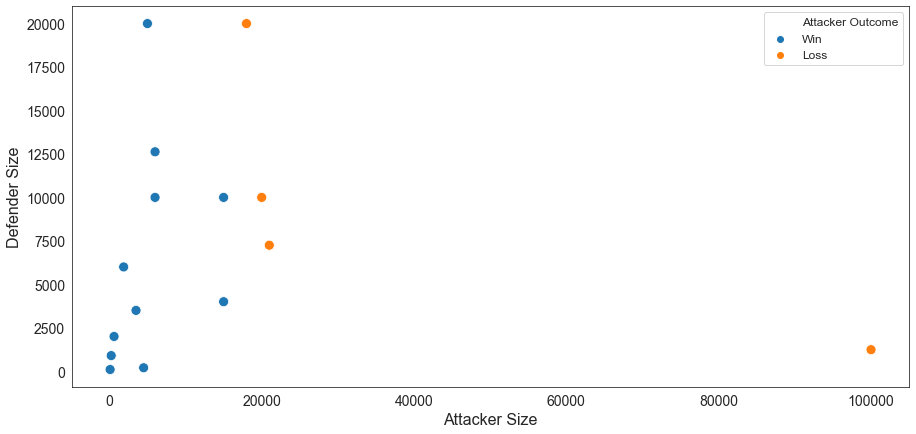

In [5]:
army_size = battles.dropna(subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
p = sns.scatterplot("attacker_size", "defender_size", hue = "attacker_outcome", data = army_size, s = 100)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")
legend = p.legend()
legend.texts[0].set_text("Attacker Outcome")
legend.texts[1].set_text("Win")
legend.texts[2].set_text("Loss")

In [6]:
army_size[army_size.attacker_size == max(army_size.attacker_size)]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,Baratheon,NaN,NaN,loss,siege,1.0,1.0,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN


It is natural to take a look at the bottom right point and ask how could the attacker lose when it has such a huge army size. In the Battle of Castle Black, Stannis's army took the 100,000 undisciplined wildlings by complete surprise. Because the wildlings were only expecting attacks from the Night's Watch at Castle Black, they left their eastern flank totally undefended.

Notice the *attacker_king* and *defender_king* should be switched for this row. The attacker king was Mance Rayder and the defender king was Stannis Baratheon. This error is fixed below.

In [7]:
battles.loc[27, "attacker_king"] = "Mance Rayder"
battles.loc[27, "defender_king"] = "Stannis Baratheon"